# Analyzing patterns in feature data

Your web GIS packs a set of tools that help you identify, quantify, and visualize spatial patterns in your data by identifying areas of statistically significant clusters.

This section demonstrates how `interpolate_points()` can be used to convert point feature data representing measurements in spot locations into a continuous prediction surface.

## Interpolate points

The 'interpolate points' tool allows you to predict values at new locations based on measurements from a collection of points. The prediction result is a polygon layer classified by predicted values. We will use this tool to create a rainfall prediction surface using data from sparse weather stations in Chennai.

In [ ]:
# Connect to GIS
from arcgis.gis import GIS
gis = GIS("portal url", "username", "password")
chennai_rainfall = gis.content.search("Chennai Rainfall", "Feature Layer")[0]

Draw the rainfall stations on a map rendered by rainfall quantity

In [ ]:
map1 = gis.map("Tamil Nadu", zoomlevel=7)
map1

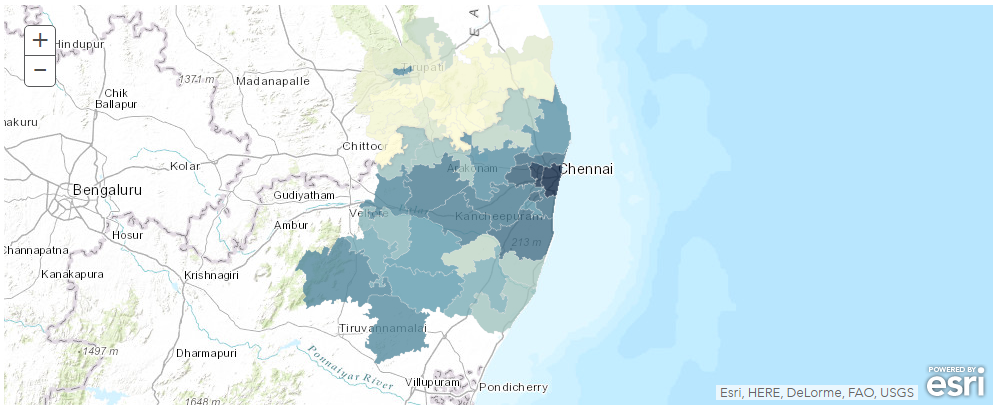</img>

In [ ]:
map.add_layer(chennai_rainfall, { "renderer":"ClassedSizeRenderer", "field_name":"RAINFALL" })

The `analyze_patterns` sub module in `features` module provides access to `interpolate_points()` method.

In [ ]:
from arcgis.features.analyze_patterns import interpolate_points

#run the interpolation tool and specify the field containing rainfall data
interpolated_rf = interpolate_points(rainfall, field='RAINFALL')

The `interpolate_points()` method accepts more optional parameters allowing you to customize the analysis task. Using those parameters, you could optionally limit the number of classes generated, specify the class breaks, etc.

If the `output_name` parameter is not specified, the tool creates a feature collection instead of creating an output feature layer.

Let us add the result to a new map

In [ ]:
interpolated_map = gis.map("Tamil Nadu", zoomlevel = 7)
interpolated_map

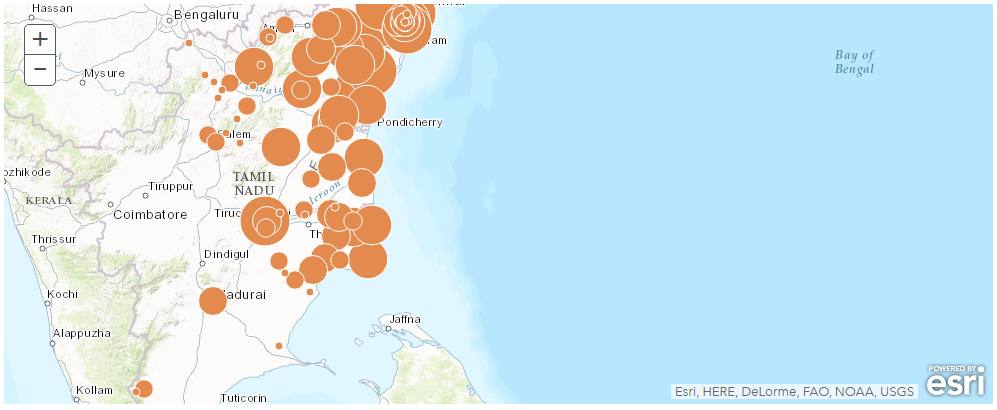</img>

In [ ]:
interpolated_map.add_layer(interpolated_rf['result_layer'])